In [1]:
import warnings;warnings.filterwarnings('ignore')
from keras.datasets import mnist
import numpy as np;import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### 1.1 mnist手写体数字识别 - 多分类任务
#### 一. 处理流程
1. 对MNIST数据集分类  
  1. MNIST数据集 : 60000个手写字母的灰度图片 (28\*28像素) + 10000个测试数据
  2. 识别图片中的数字进行分类 : 0-9
2. 编程步骤 :  
  3. 数据预处理  
    1. 输入数据的shape变成符合第一层神经网络输入的需求 : 28\*28的像素展开成一列作为一个输入样本
    2. 输入数据归一化 : 因为灰度值在0~255不方便训练, 所以归一化每个像素点为0~1的值
    4. 输出数据向量化 : `keras.utils.to_categorical(labels)` : 将输出one-hot编码, keras输出ndarray, 每行为一个输出向量  
     因为数据集中的输出标签为0~9的数字, 为了让输出满足softmax的向量化, 所以使用keras的to_categorical把输出进行独热编码变成向量
  1. 定义神经网络结构  
    1. 第一层: Dense层, 密集连接层 (也叫全连接层)
    2. 第二层: 10路softmax层, 返回一个数组, 表示被分到10个数字的概率值
  2. 编译步骤 : 
   为了让神经网络进行训练, 还要定义额外的3个编译步骤
    1. loss function : 衡量神经网络表现的方法, 也是神经网络不断迭代的正确方向
    2. optimizer : 神经网络训练的优化方法
    3. Metrics to monitor during training and testing : 这里我们使用精确度度量 (被正确分类的数目)  
  5. 训练模型  
    

In [25]:
# 1. 导入mnist数据集
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
print 'train shape: ',train_images.shape  # ndarray

# 2. 数据预处理
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

# one-hot输出
from keras import utils
print 'labels: ',test_labels
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)
test_labels[:2]

train shape:  (60000, 28, 28)
labels:  [7 2 1 ... 4 5 6]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
# 3. 构建网络
from keras import models
from keras import layers
network = models.Sequential()
# input_shape : 输入张量的形状, (28*28,)表示1维度向量
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
# 4. 编译
network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# 5. 训练模型
network.fit(train_images,train_labels,epochs=5,batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.2028 - acc: 0.9396
Epoch 2/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.0912 - acc: 0.9741
Epoch 3/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.0655 - acc: 0.9814
Epoch 4/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.0525 - acc: 0.9859
Epoch 5/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0429 - acc: 0.9889


In [28]:
# 找出分类
predictions = network.predict(test_images)
print predictions[0]
print predictions[0].sum() # 正式第一个预测中, 所有种类的和是1
# 每个种类的概率中, 概率最大的为预测的输出
print 'test[0] is ',np.argmax(predictions[0])

# 测试集表现
test_loss,test_acc = network.evaluate(test_images,test_labels)
print('test_acc: ', test_acc)

[9.5000026e-17 2.2441869e-20 4.2905190e-11 6.8090822e-10 1.6014682e-22
 3.3031300e-14 1.5066769e-26 1.0000000e+00 2.5705072e-15 2.3972688e-12]
1.0
test[0] is  7
10000/10000 [==============================] - 0s 46us/step
('test_acc: ', 0.9789)


#### 二. 展示MNIST数据集中的图片

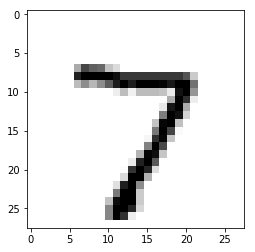

In [29]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
digit = test_images[0]
plt.imshow(digit,cmap=plt.cm.binary) # cmap : colormap, 默认为空,表示输入数据为3Dtensor, RGB图像

#### 三. 收获
1. 分N类, 最后一层的全连接层要有N个单元, 且使用'softmax'激活函数  
2. 多分类损失函数 : `categorical_crossentropy`  

### 1.2 Data Representation

#### 一. 张量 Tensor
1. Scalar - 0D张量
2. Vector - 1D张量
3. Matrix - 2D张量
4. 3D张量和多维张量

#### 二. Tensor的3个属性
1. number of axes(rank) : 张量是几维的
```python
print x.ndim # 0
print y.ndim # 1
print z.ndim # 2
print n3.ndim # 3
```
2. shape : 标量没有的shape为空 : ()

3. datd type 



In [3]:
# 标量 : 0D-tensor
x = np.array(10)

# 1D-tensor
y = np.array([12,3,6,14])

# 2D-tensor
z = np.array([[5,78,2,34,0],
             [6,79,3,35,1],
             [7,89,4,36,2]])

# 3D-tensor
n3 = np.array([[[1,2,3],
                        [2,3,3]],
                      [[1,34,1],
                        [3,5,6]]])

print '0d.shape: ',x.shape
print '1d.shape: ',y.shape
print '2d.shape: ', z.shape
print '3d.shape: ',n3.shape

0d.shape:  ()
1d.shape:  (4,)
2d.shape:  (3, 5)
3d.shape:  (2, 2, 3)


#### 四. 真实世界中数据张量的例子
1. Vector data  
 2D张量 (features)
2. TimeSeries数据/序列数据  
 3D张量 (samples, timestamps, features)
3. Images  
 4D张量 (samples, height,width,channels)
4. Video  
 5D张量 (samples,frames,height,width,channel)

### 1.3 电影评论-二分类问题
1. IMDB数据集包括50000条电影评论. 
1. 根据评论, 训练出是否喜欢这个电影

#### 一. 读取数据
1. IMDB数据集已被预处理, 将评论里的每个文字转换成Integer, 表示文字在字典里的编号  
2. train_data = [1,194,2,194 ...]  
 train_label = 0/1
3. 训练和擦拭数据都是25,000条

In [5]:
from keras.datasets import imdb
# num_words=1000 : 只把每条评论中, 单词在使用频率2前10,000名的作为输入序列中的数据
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=1000)
print train_data[0][:10]
type(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65]


list

In [6]:
# 番外篇 : 如何将评论的证书序列, 还原为文字序列
# word_index : {u'fawn': 34701,
#  u'tsukino': 52006,
#  u'nunnery': 52007
#  ...}
word_index = imdb.get_word_index()
# dict数据结构,自动按照key排序
# reverse_word_index = {1: u'the',2: u'and',3: u'a' ... }
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
# i-3的原因 : 0,1,2代表'padding', 'start of sequence' , 'unkown'
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

u"? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all"

#### 二. 数据预处理
1. 对评论的整数序列one-hot编码, 将所有评论变成(评论数*字典长度)的张量   
 张量(samples,word_indices)
2. 生成输出张量: 0/1组成的向量

In [7]:
import numpy as np
def vectroize_sequences(sequences,dimenssion=10000):
    row_num = len(sequences)
    results = np.zeros((row_num,dimenssion))
    # 二维数组结构, 经过enumerate, 生成(行号,内容)元组
    for i,sequence in enumerate(sequences):
        # adarray元素选取: results[i,[sequence]]
        results[i,sequence] = 1
    return results
        
# 构造输入数据: 评论数*10000维
x_train = vectroize_sequences(train_data)
x_test = vectroize_sequences(test_data)

y_train = np.array(train_labels,dtype='float32')
y_test = np.array(test_labels,dtype='float32')

print x_train[0]
print y_train

[0. 1. 1. ... 0. 0. 0.]
[1. 0. 0. ... 0. 1. 0.]


#### 三. 构建网络

In [8]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
# 输入数据为字典长度的向量(one-hot)
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
          
model.compile(optimizer=optimizers.rmsprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

#### 四. 训练网络
1. model.fit()返回一个`History`对象, 该对象包含一些训练集上的监控指标    
 ['acc', 'loss', 'val_acc', 'val_loss']
2. 用`history`对象中记录的数值, 画出训练集和验证机上的损失率  
 发现第四轮后, 验证机的精确度开始下降, 发生过拟合, 后面介绍如何避免过拟合

In [9]:
# 验证集
x_val = x_train[:10000]
y_val = y_train[:10000]
# 训练集
x_train = x_train[10000:]
y_train = y_train[10000:]

history = model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_val,y_val))
history_dict = history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 284us/step - loss: 0.4011 - acc: 0.8286 - val_loss: 0.3350 - val_acc: 0.8608
Epoch 2/20
15000/15000 [==============================] - 4s 244us/step - loss: 0.3287 - acc: 0.8613 - val_loss: 0.3393 - val_acc: 0.8575
Epoch 3/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.3158 - acc: 0.8666 - val_loss: 0.3347 - val_acc: 0.8595
Epoch 4/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.3046 - acc: 0.8737 - val_loss: 0.3325 - val_acc: 0.8580
Epoch 5/20
15000/15000 [==============================] - 4s 248us/step - loss: 0.2917 - acc: 0.8803 - val_loss: 0.3450 - val_acc: 0.8550
Epoch 6/20
15000/15000 [==============================] - 4s 246us/step - loss: 0.2815 - acc: 0.8850 - val_loss: 0.3420 - val_acc: 0.8566
Epoch 7/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.2699 - acc: 0.8890 - val_loss: 0.3541 - 

['acc', 'loss', 'val_acc', 'val_loss']

[[0.14866221]
 [0.99999833]
 [0.9434433 ]
 ...
 [0.19544445]
 [0.00467395]
 [0.24093705]]


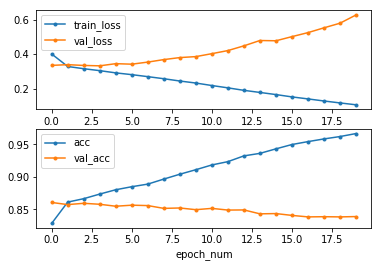

In [11]:
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

f,axes = plt.subplots(2,1)

train_loss_df = pd.DataFrame({'train_loss':train_loss,'val_loss':val_loss})
train_loss_df.index.name='epoch_num'
train_loss_df.plot(style='.-',ax=axes[0])


train_acc_df = pd.DataFrame({'acc':acc,'val_acc':val_acc})
train_acc_df.index.name='epoch_num'
train_acc_df.plot(style='.-',ax=axes[1])

print model.predict(x_test)

#### 五. 收获
1. 要进行数据预处理, 把输入数据转成tensor  
2. `relu`函数作为Dense的处理函数, 可以处理大多数问题  
3. 二分类问题, 最后的输出函数使用sigmoid, 损失函数使用`binary-crossentropy`  
4. `rmsprop`优化器足够好, 无论处理什么问题  
5. 训练网络时, 设置验证集来观测网络表现

### 1.4 波士顿房价预测 - 回归问题

#### 一. 数据预处理
1. 波士顿1970's的房价: 404训练集, 102测试集
2. 正则化数据 : column = (column - mean)/column上的标准差  
 测试集输入也要正则化, 其mean与std都取自训练集, 不要使用任何在测试机上计算的常量处理测试集

In [36]:
from keras.datasets import boston_housing
((train_data,train_targets),(test_data,test_target)) = boston_housing.load_data()
print train_data.shape,train_targets.shape
print train_targets[:10]
# 正则化数据
mean = train_data.mean(axis=0) # 列上进行
train_data -= mean
std = train_data.std(axis=0)
test_data = (test_data-mean)/std

(404, 13) (404,)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


#### 二. 构建网络
1. 最后一层输出层不用激活函数运算, 只用一个单元的全连接层输出数值即可
2. MSE : 均方误差  
 MAE : 平均绝对误差

In [65]:
from keras import layers
from keras import models

feature_num = train_data.shape[1]
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(feature_num,)))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
# 样本数量少, batch数量设置1,epoch设置的多一点
history = model.fit(train_data,train_targets,epochs=100,batch_size=16,verbose=0)

#### 三. 训练网络及绘制表现

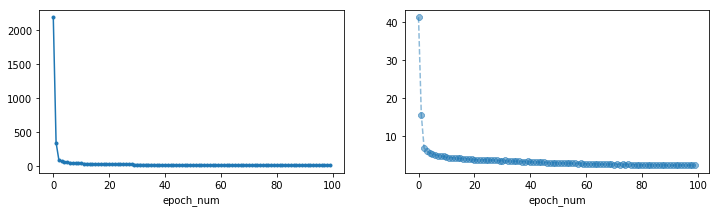

In [66]:
history_dict = history.history
f,axes = plt.subplots(1,2,figsize=(12,3))
df = pd.DataFrame({'loss':history_dict['loss'],'mean_absolute_error':history_dict['mean_absolute_error']})
df.index.name = 'epoch_num'
df['loss'].plot(style='.-',ax=axes[0])
df['mean_absolute_error'].plot(style='8--',ax=axes[1],alpha=0.5)

In [67]:
test_mse_score,test_mae_score = model.evaluate(test_data,test_target)
print test_mse_score,',',test_mae_score

102/102 [==============================] - 0s 872us/step
341.12205295936735 , 17.59241833406336


#### 四. 收获
1. 回归问题, 损失函数/metrix函数为: MSE(均方误差)/MAE(平均绝对误差)
2. 回归问题的feature需要正则化 : (feature-mean)/std
3. 小数据集应该减小网络隐藏层数量 (1~2层即可)